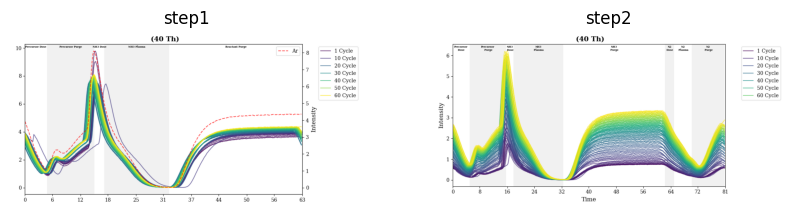

In [158]:
# reference plot from J. Kim
import matplotlib.pyplot as plt
import matplotlib.image as img
fig, axs = plt.subplots(1,2, figsize=(10,8))
axs[0].imshow(img.imread('image/(40 Th)_step1.png'))
axs[0].set_title('step1')
axs[0].axis('off')
axs[1].imshow(img.imread('image/(40 Th)_step2.png'))
axs[1].set_title('step2')
axs[1].axis('off')
plt.show()

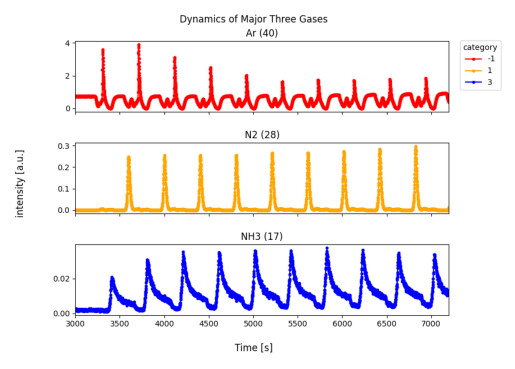

In [30]:
plt.imshow(img.imread('image/Dynamics of Major Three Gases.png'))
plt.axis('off')
plt.show()

In [159]:
# concatenate datasets
import os
#Open the H5 file in read mode
path = 'data/text_file/'
file = os.listdir(path)
file

['2024.07.29.09h46m45s_process.h5.txt',
 '2024.07.29.10h10m45s_process.h5.txt',
 '2024.07.29.10h34m45s_process.h5.txt',
 '2024.07.29.10h58m45s_process.h5.txt',
 '2024.07.29.11h22m45s_process.h5.txt',
 '2024.07.29.11h46m45s_process.h5.txt']

In [160]:
import pandas as pd
dfs = []
for f in file:
    dfs.append(pd.read_csv(path+f, sep='\t', encoding_errors='ignore'))
    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(37994, 402)


,time,(2 Th),(3 Th),(4 Th),(5 Th),(6 Th),(7 Th),(8 Th),(9 Th),(10 Th),...,RG monitor [V],RG current limit flag,RB target [V],RB monitor [V],RB current limit flag,5CHV Board A temp monitor [C],update time [s],total SDO read errors,failed HTTP GET count,Unnamed: 401
0,2024-07-29 09:46:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.219,0,700,700.75,0,31.12,0.125,0,0,NaN
1,2024-07-29 09:46:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN
2,2024-07-29 09:46:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN
3,2024-07-29 09:46:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN
4,2024-07-29 09:46:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,246.178,0,700,700.75,0,31.12,0.140,0,0,NaN


In [168]:
pressure1 = df.loc[:,'PRESSFLOAT1 monitor [mbar]']
pressure2 = df.loc[:,'PRESSFLOAT2 monitor [mbar]']
pressure3 = df.loc[:,'PRESSFLOAT3 monitor [mbar]']
pressure4 = df.loc[:,'PRESSFLOAT4 monitor [mbar]']

print('pressure 1 :', pressure1.min(), pressure1.max())
print('pressure 2 :', pressure2.min(), pressure2.max())
print('pressure 3 :', pressure3.min(), pressure3.max())
print('pressure 4 :', pressure4.min(), pressure4.max())

pressure 1 : 1.39308 1.74573
pressure 2 : 3.81157e-08 1.27299e-06
pressure 3 : 2.2269e-07 2.52257e-07
pressure 4 : 1000 1000


In [187]:
[range(len(pressure2))]

[range(0, 37994)]

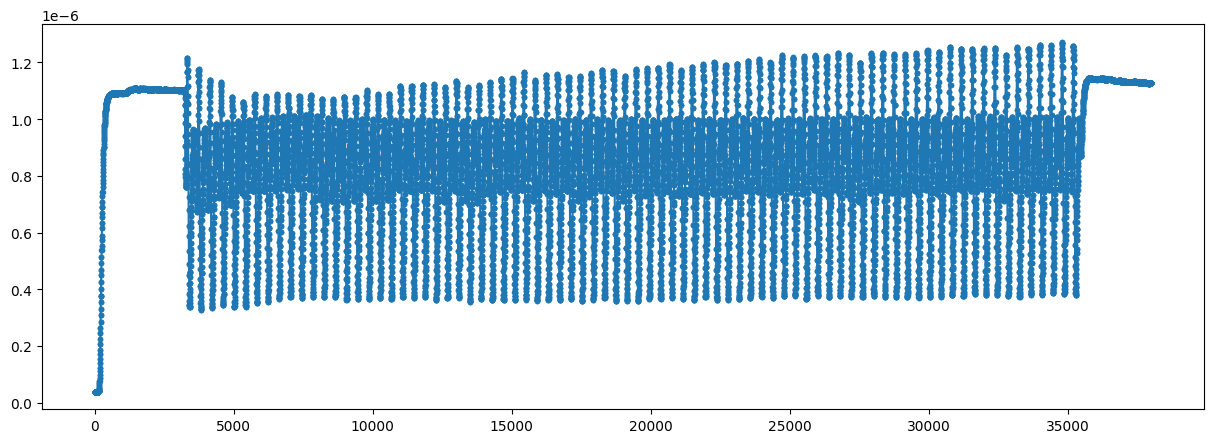

In [258]:
plt.figure(figsize=(15,5))
plt.plot(pressure2, '.-')

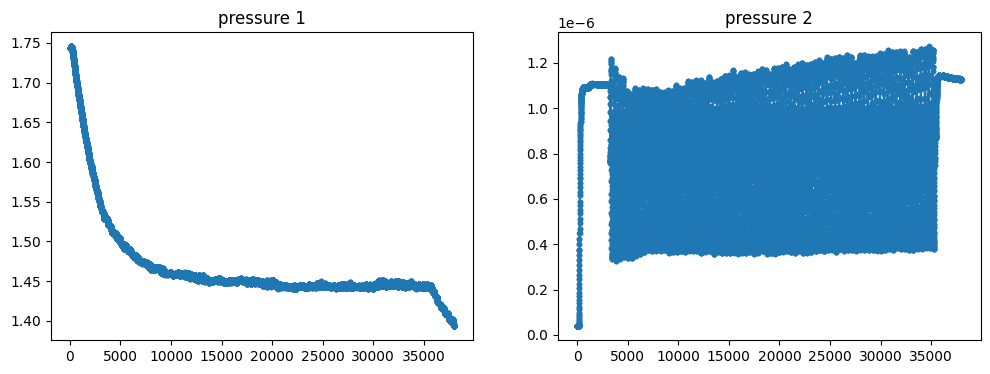

In [189]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(pressure1, '.-')
axs[0].set_title('pressure 1')
axs[1].plot(pressure2, '.-')
axs[1].set_title('pressure 2')
plt.show()

In [192]:
# preprocessing as done in p1
df = df.iloc[:,:315]

df['time'] = df['time'].apply(lambda x : x.split(' ')[1]) # index is set to time [s]
df = df.groupby('time')[df.columns[1:]].mean().reset_index()
df = df.drop(columns=['time'])

df.index.name = 'time'
df.columns = range(2, 316) # (2 Th) -> 2
df.head()

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
# category
df_max = pd.read_csv('tof_max_category.csv', index_col='Unnamed: 0')

category_mass = [[40]] # Ar shows the highest value
for i in range(1,10):
    category_mass.append(list(df_max[df_max['category']==i].index))
print(category_mass[:4])

category_df = []
for i in category_mass[:4]:
    temp = []
    for j in i:
        temp.append((df.loc[:,j]).to_frame())
    if len(temp) >1: # concat
        category_df.append(pd.concat(temp, axis=1))
    else:
        category_df.append((df.loc[:,i]))
print(len(category_df))

[[40], [28], [63, 85, 98], [16, 17, 20, 30, 36, 65, 100, 133, 135]]
4


In [194]:
# MinMaxScaling
from sklearn.preprocessing import MinMaxScaler

# scaling on each category
category_df_scaled = []
for df_elem in category_df:
    mm = MinMaxScaler()
    df_elem_scaled = mm.fit_transform(df_elem.to_numpy())
    df_elem_scaled = pd.DataFrame(df_elem_scaled, columns=df_elem.columns)
    category_df_scaled.append(df_elem_scaled)

category_df_scaled[0]

,40
0,0.000003
1,0.000004
2,0.000002
3,0.000006
4,0.000001
...,...
7595,0.535784
7596,0.536809
7597,0.535861
7598,0.535518


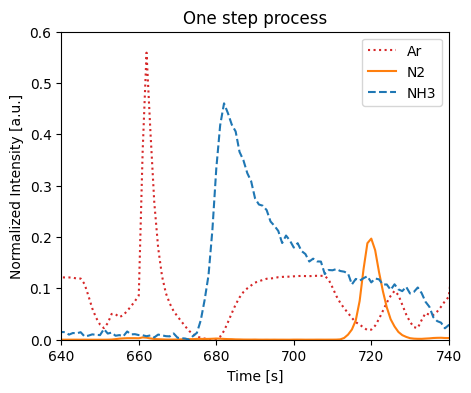

In [213]:
ar = category_df_scaled[0].loc[:,40]
n2 = category_df_scaled[1].loc[:,28]
nh3 = category_df_scaled[3].loc[:,17]
category_to_plot = [ar, n2, nh3]
colors = ['tab:red', 'tab:orange', 'tab:blue']
line_style = [':','-','--']

# plot together
plt.figure(figsize=(5,4))
for idx, val in enumerate(category_to_plot):
    plt.plot(val,line_style[idx],color=colors[idx])
    plt.xlabel('Time [s]')
    plt.xlim(640,740)
    plt.ylim(0,0.6)
    plt.ylabel('Normalized Intensity [a.u.]')
plt.legend(['Ar','N2','NH3'])
plt.title('One step process')
plt.show()

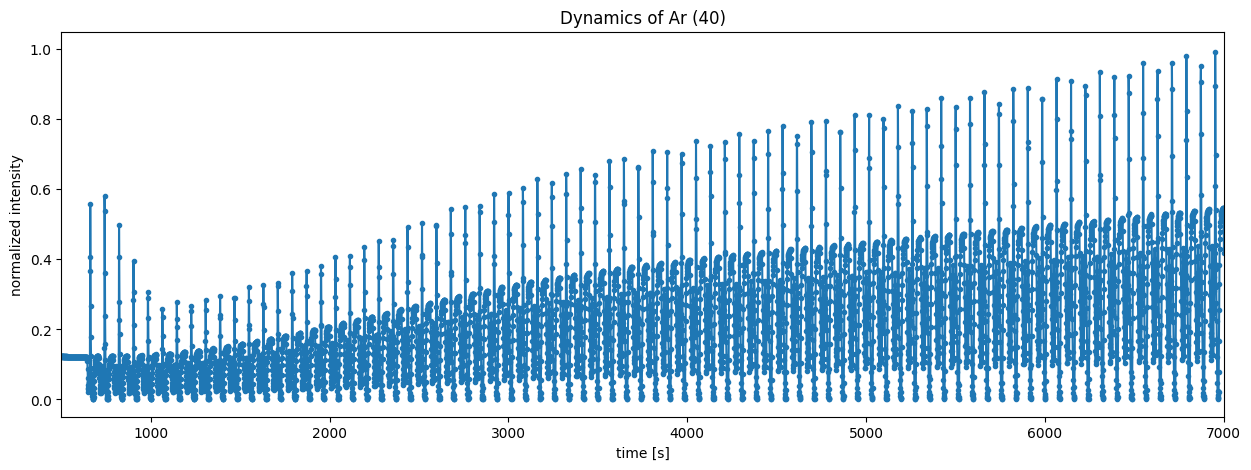

In [260]:
plt.figure(figsize=(15,5))
plt.plot(category_df_scaled[0][500:7600], '.-')
plt.xlabel('time [s]')
plt.xlim(500,7000)
plt.ylabel('normalized intensity')
plt.title('Dynamics of Ar (40)')
plt.show()

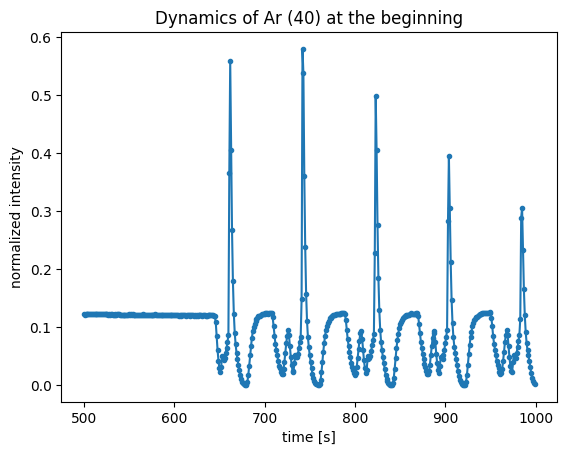

In [215]:
# plt.figure(figsize=(15,5))
plt.plot(category_df_scaled[0][500:1000], '.-')
plt.xlabel('time [s]')
plt.ylabel('normalized intensity')
plt.title('Dynamics of Ar (40) at the beginning')
plt.show()

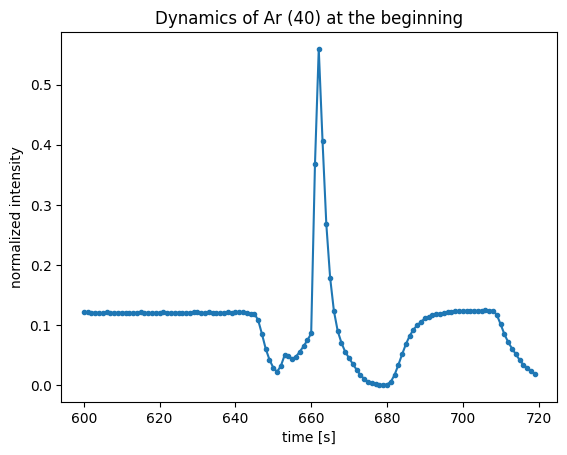

In [216]:
plt.plot(category_df_scaled[0][600:720], '.-')
plt.xlabel('time [s]')
plt.ylabel('normalized intensity')
plt.title('Dynamics of Ar (40) at the beginning')
plt.show()

In [217]:
category_df_scaled[0].iloc[660:670,:]

,40
660,0.086271
661,0.367100
662,0.559161
663,0.405864
664,0.267692
665,0.179112
666,0.123754
667,0.090480
668,0.070567
669,0.055580


In [226]:
# turn the df to list
import itertools
import numpy as np
array40 = list(itertools.chain(*category_df_scaled[0].values.tolist()))

peak_idx = 662 # index of the first peak
cycle = (len(array40) - peak_idx) // 80
interval_40 = []
for i in range(cycle): # how many cycles recorded?
    interval_40.append(array40[peak_idx-39:peak_idx+41]) # split the interval into pieces roughly; this will be used to find a local maximum
    peak_idx += 80 # considering the total cycle
print(len(interval_40), len(interval_40[0]))

86 80


In [227]:
# find a local maximum 
max_40 = []
for i in interval_40:
    max_40.append(np.max(i))
max_40[:5]

[np.float64(0.5591611739333755),
 np.float64(0.5802633684797905),
 np.float64(0.4988269996287272),
 np.float64(0.3955240741501964),
 np.float64(0.30612106817147605)]

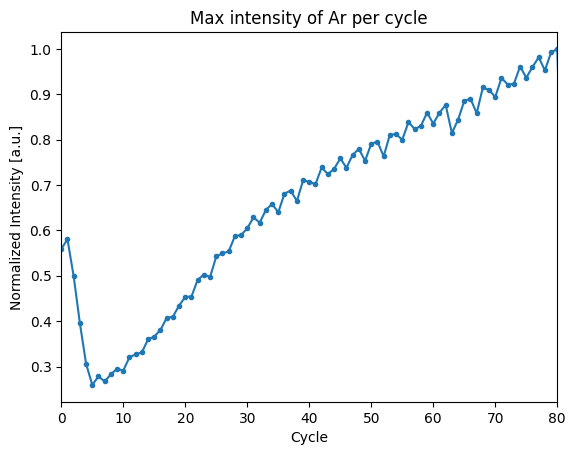

In [228]:
plt.plot(max_40,'.-')
plt.xlabel('Cycle')
plt.xlim(0,80)
plt.ylabel('Normalized Intensity [a.u.]')
plt.title('Max intensity of Ar per cycle')
plt.show()

In [234]:
# max values to indices
max_40_idx = []
cursor = 0
for idx, val in enumerate(array40):
    if val == max_40[cursor]:
        max_40_idx.append(idx)
        cursor += 1
    if cursor == len(max_40):
        break
max_40_idx[:5]

[662, 742, 823, 904, 985]

In [238]:
# new interval w.r.t the max values
interval_40 = []
cursor = 0
for i in range(cycle):
    start = max_40_idx[cursor]-39
    end = max_40_idx[cursor]+41
    interval_40.append(array40[start:end])
    cursor += 1

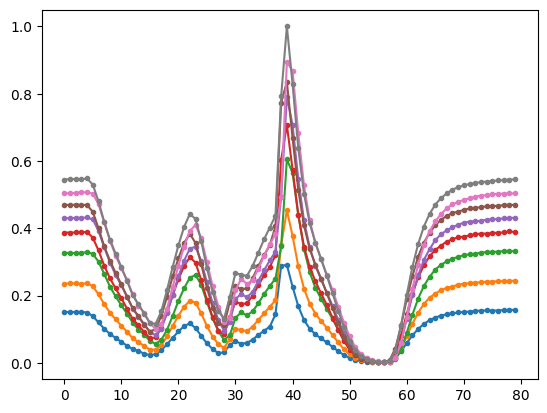

In [240]:
for i in range(8): # plot the cycles 10, 20, ..., 80
    plt.plot(interval_40[10*(i+1)],'.-')
plt.show()

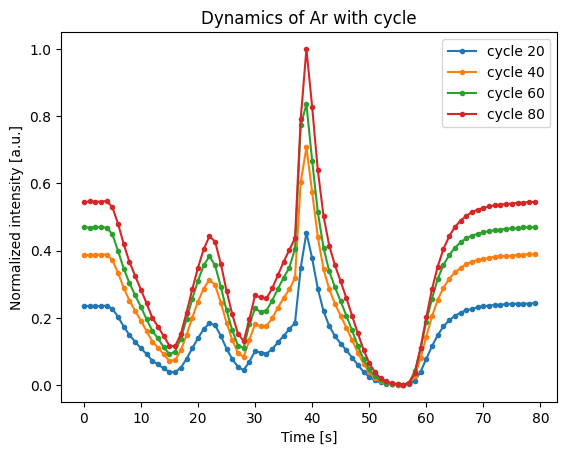

In [251]:
for i in range(4): # plot the cycles 20, 40, ...
    plt.plot(interval_40[20*(i+1)],'.-')
plt.legend(['cycle '+str(20*(i+1)) for i in range(4)])
plt.xlabel('Time [s]')
plt.ylabel('Normalized intensity [a.u.]')
plt.title('Dynamics of Ar with cycle')
plt.show()

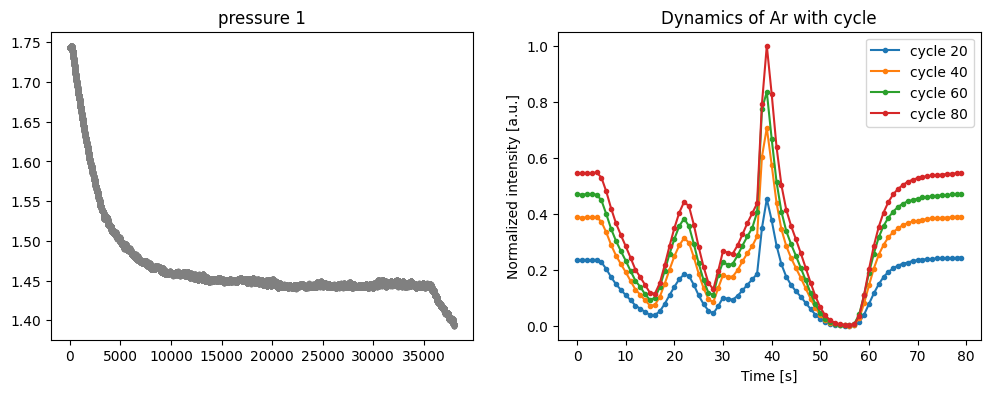

In [255]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(pressure1, '.-',color='gray')
axs[0].set_title('pressure 1')
axs[0].lim()

for i in range(4): # plot the cycles 20, 40, ...
    axs[1].plot(interval_40[20*(i+1)],'.-')
axs[1].legend(['cycle '+str(20*(i+1)) for i in range(4)])
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Normalized intensity [a.u.]')
axs[1].set_title('Dynamics of Ar with cycle')
plt.show()

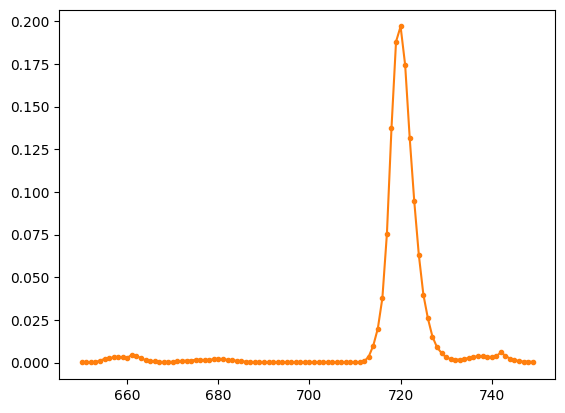

In [269]:
# do the same to other molecules
plt.plot(n2[650:750], '.-',color='tab:orange')

In [271]:
n2[710:730]

710    0.000155
711    0.000229
712    0.000678
713    0.003451
714    0.009900
715    0.019914
716    0.037757
717    0.075620
718    0.137339
719    0.188078
720    0.196968
721    0.174424
722    0.131658
723    0.094528
724    0.063156
725    0.039855
726    0.025809
727    0.015123
728    0.008929
729    0.005530
Name: 28, dtype: float64

In [276]:
# make a method to create intervals w.r.t max values

def CycleDynamics(df, peak_idx):
    # turn the df to list
    array = df
    # array = list(itertools.chain(*df.values.tolist()))
    
    peak_idx = 662 # index of the first peak
    cycle = (len(array) - peak_idx) // 80
    interval = []
    for i in range(cycle): # how many cycles recorded?
        interval.append(array[peak_idx-39:peak_idx+41]) # split the interval into pieces roughly; this will be used to find a local maximum
        peak_idx += 80 # considering the total cycle
    print(len(interval), len(interval[0]))
    
    # find a local maximum 
    max = []
    for i in interval:
        max.append(np.max(i))
    
    # plt.plot(max,'.-')
    # plt.xlabel('Cycle')
    # plt.xlim(0,80)
    # plt.ylabel('Normalized Intensity [a.u.]')
    # plt.title('Max intensity of Ar per cycle')
    # plt.show()
    
    # max values to indices
    max_idx = []
    cursor = 0
    for idx, val in enumerate(array):
        if val == max[cursor]:
            max_idx.append(idx)
            cursor += 1
        if cursor == len(max):
            break
    max_idx[:5]
    
    # new interval w.r.t the max values
    interval = []
    cursor = 0
    for i in range(cycle):
        start = max_idx[cursor]-39
        end = max_idx[cursor]+41
        interval.append(array[start:end])
        cursor += 1
    
    return interval

86 80


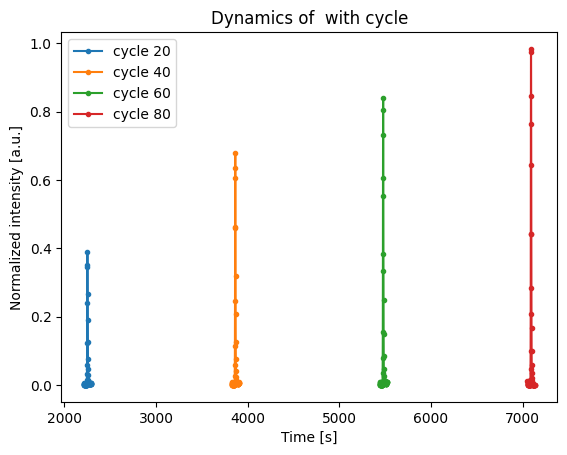

In [277]:
interval = CycleDynamics(n2, 720)
for i in range(4): # plot the cycles 20, 40, ...
    plt.plot(interval[20*(i+1)],'.-')
plt.legend(['cycle '+str(20*(i+1)) for i in range(4)])
plt.xlabel('Time [s]')
plt.ylabel('Normalized intensity [a.u.]')
plt.title('Dynamics of  with cycle')
plt.show()

In [ ]:
    for i in range(4): # plot the cycles 20, 40, ...
        plt.plot(interval[20*(i+1)],'.-')
    plt.legend(['cycle '+str(20*(i+1)) for i in range(4)])
    plt.xlabel('Time [s]')
    plt.ylabel('Normalized intensity [a.u.]')
    plt.title('Dynamics of  with cycle')
    plt.show()